In [1]:
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data_utils
import matplotlib.pyplot as plt
import torch
import torchvision
import time

from model import VAE
from GECO import *
from beta_vae import *
torch.cuda.set_device(5)


%matplotlib inline

In [40]:
# !nvidia-smi

In [3]:
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'
print(device)

cuda


In [29]:
def plot_gallery(images, h, w, n_row=3, n_col=6):
    plt.figure(figsize=(1.5 * n_col, 1.7 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray, vmin=-1, vmax=1, interpolation='nearest')
        plt.xticks(())
        plt.yticks(())

In [34]:
mnist_train_set = torchvision.datasets.MNIST('./data/mnist/', download=True, train=True, \
                                            transform=torchvision.transforms.ToTensor())
mnist_test_set = torchvision.datasets.MNIST('./data/mnist/', download=True, train=False, \
                                            transform=torchvision.transforms.ToTensor())

In [35]:
batch_size = 2000
mnist_train_loader = torch.utils.data.DataLoader(mnist_train_set, \
                                                 batch_size=batch_size, shuffle=True, drop_last=True)
mnist_test_loader = torch.utils.data.DataLoader(mnist_test_set, \
                                                batch_size=batch_size, shuffle=True, drop_last=True)

In [36]:
vae_model =  VAE(dims = [28*28, 512, 512, 256, 256], dim_latent = 200)
vae_model.to(device)

optimizer = optim.Adam(vae_model.parameters(), lr=1e-3)
# scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=10, verbose=True)
scheduler = None

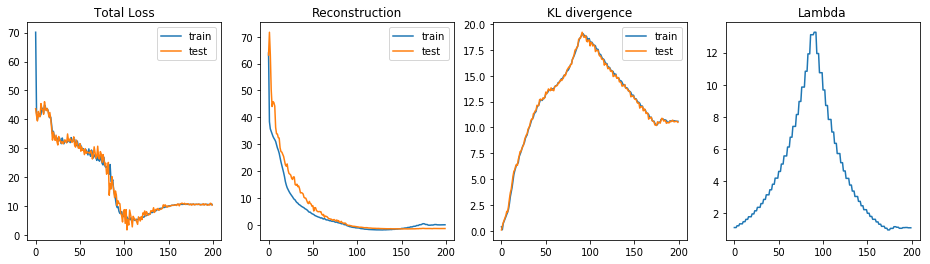

Epoch 200 of 200 took 6.924s
  training loss (in-iteration): 	10.620706
  validation loss (in-iteration): 	10.369885


In [37]:
train_geco(vae_model, optimizer, scheduler, 
           train_loader = mnist_train_loader, 
           valid_loader = mnist_test_loader, 
           device = device, lbd_step = 100, 
           num_epochs=200,lambd_init = torch.FloatTensor([1]),
           tol = 4)

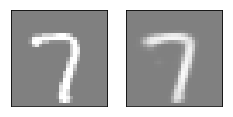

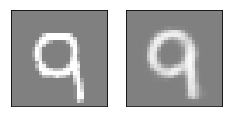

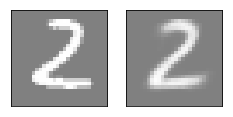

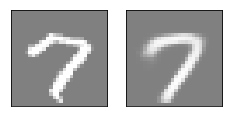

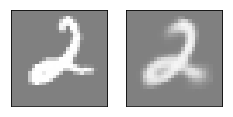

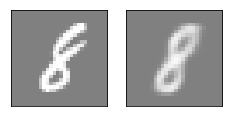

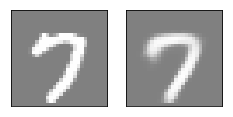

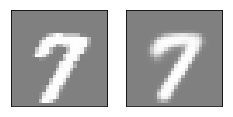

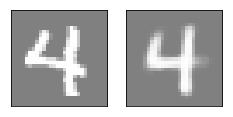

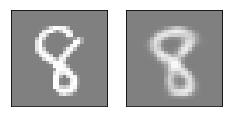

In [38]:
mnist_test_loader = torch.utils.data.DataLoader(mnist_test_set, \
                                                batch_size=1, shuffle=True, drop_last=True)
for j, data in enumerate(mnist_test_loader, 0):
    input = data[0].reshape(mnist_test_loader.batch_size, -1).to(device)
    
    reconstruction_mu, _, _, _ = vae_model(input)
    plot_gallery([data[0].numpy(), reconstruction_mu.data.cpu().numpy()], 28, 28, n_row=1, n_col=2)
    if (j >= 9):
        break

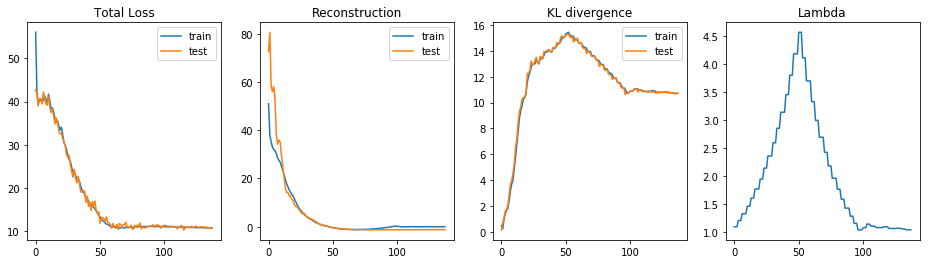

Epoch 138 of 200 took 8.044s
  training loss (in-iteration): 	10.714199
  validation loss (in-iteration): 	10.628474


KeyboardInterrupt: 

In [27]:
# VAE(dims = [28*28, 2048, 256], dim_latent = 200)
train_geco(vae_model, optimizer, scheduler, 
           train_loader = mnist_train_loader, 
           valid_loader = mnist_test_loader, 
           device = device, lbd_step = 100, 
           num_epochs=200,lambd_init = torch.FloatTensor([1]),
           tol = 4)

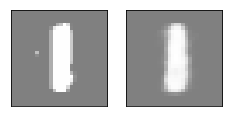

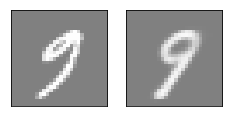

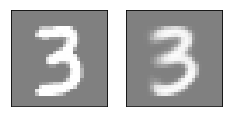

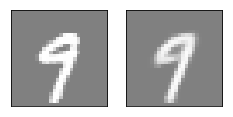

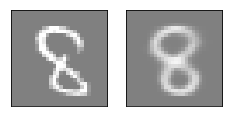

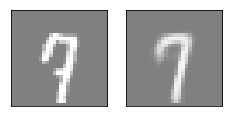

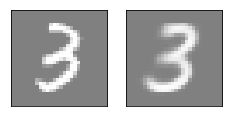

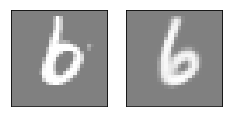

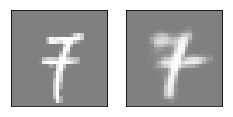

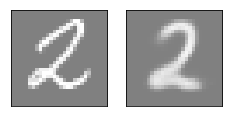

In [30]:
mnist_test_loader = torch.utils.data.DataLoader(mnist_test_set, \
                                                batch_size=1, shuffle=True, drop_last=True)
for j, data in enumerate(mnist_test_loader, 0):
    input = data[0].reshape(mnist_test_loader.batch_size, -1).to(device)
    
    reconstruction_mu, _, _, _ = vae_model(input)
    plot_gallery([data[0].numpy(), reconstruction_mu.data.cpu().numpy()], 28, 28, n_row=1, n_col=2)
    if (j >= 9):
        break

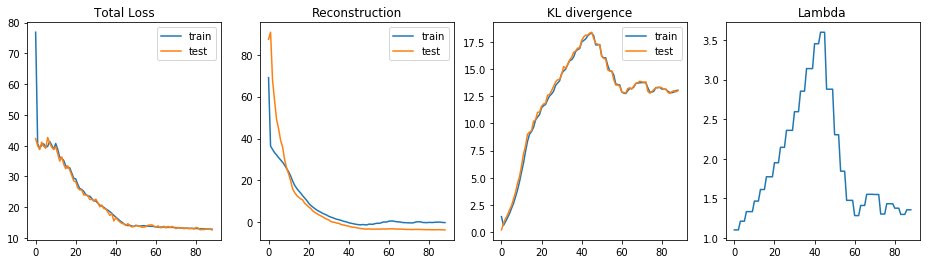

Epoch 89 of 100 took 9.933s
  training loss (in-iteration): 	12.886917
  validation loss (in-iteration): 	12.644305


KeyboardInterrupt: 

In [9]:
train_geco(vae_model, optimizer, scheduler, 
           train_loader = mnist_train_loader, 
           valid_loader = mnist_test_loader, 
           device = device, lbd_step = 100, 
           num_epochs=100,lambd_init = torch.FloatTensor([1]),
           tol = 3)

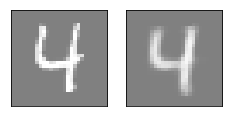

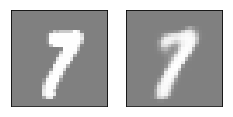

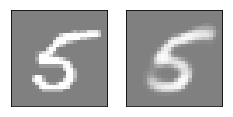

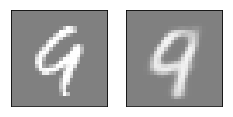

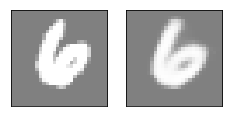

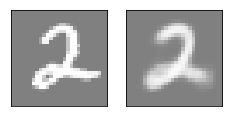

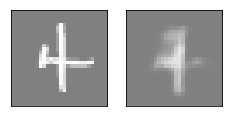

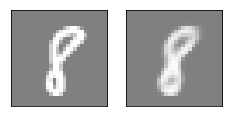

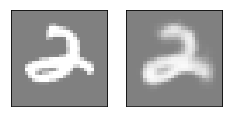

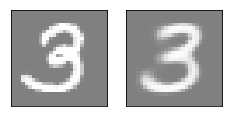

In [17]:
mnist_test_loader = torch.utils.data.DataLoader(mnist_test_set, \
                                                batch_size=1, shuffle=True, drop_last=True)
for j, data in enumerate(mnist_test_loader, 0):
    input = data[0].reshape(mnist_test_loader.batch_size, -1).to(device)
    
    reconstruction_mu, _, _, _ = vae_model(input)
    plot_gallery([data[0].numpy(), reconstruction_mu.data.cpu().numpy()], 28, 28, n_row=1, n_col=2)
    if (j >= 9):
        break

In [31]:
torch.save(vae_model.state_dict(), 'taming_vae_hid150_tol4_09_11.pth')

In [30]:
vae_model = VAE(28 * 28, 250, 100)
vae_model.to(device)

optimizer = optim.Adam(vae_model.parameters(), lr=1e-3)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=10, verbose=True)

batch_size = 2000
mnist_train_loader = torch.utils.data.DataLoader(mnist_train_set, \
                                                 batch_size=batch_size, shuffle=True, drop_last=True)
mnist_test_loader = torch.utils.data.DataLoader(mnist_test_set, \
                                                batch_size=batch_size, shuffle=True, drop_last=True)

In [33]:
train_beta(vae_model, optimizer, scheduler, loss_beta_vae, mnist_train_loader, mnist_test_loader, num_epochs=100, beta=0.5)

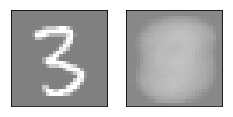

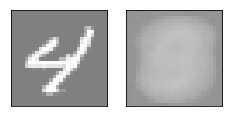

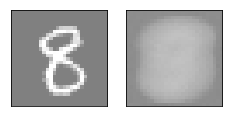

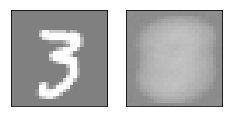

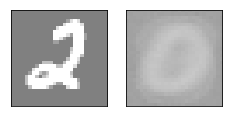

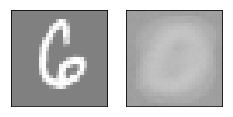

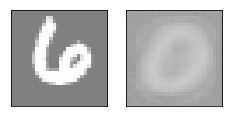

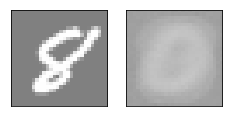

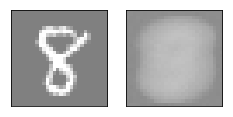

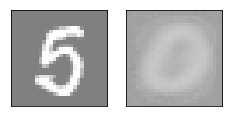

In [34]:
mnist_test_loader = torch.utils.data.DataLoader(mnist_test_set, \
                                                batch_size=1, shuffle=True, drop_last=True)
for j, data in enumerate(mnist_test_loader, 0):
    input = data[0].reshape(mnist_test_loader.batch_size, -1).to(device)
    
    reconstruction_mu, _, _, _ = vae_model(input)
    plot_gallery([data[0].numpy(), reconstruction_mu.data.cpu().numpy()], 28, 28, n_row=1, n_col=2)
    if (j >= 9):
        break

In [ ]:
### 
class CELEBA(torchvision.datasets.ImageFolder):
    def __init__(self, root='./data/celeba/', train=True, transform=None):   
        if train:
            root = root + 'train'
        else:
            root = root + 'test'
        super().__init__(root=root, transform=transform)
    
    def __getitem__(self, index):
        return super().__getitem__(index)[0]